# Labolatorium 4 - Całkowanie numeryczne

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from math import exp, log, sin, sqrt
from random import randint

In [2]:
f1 = lambda x : exp ((-1) * x**2) * (log(x))**2
f2 = lambda x : 1 / (x**3 - 2 * x - 5)
f3 = lambda x : x**5 * exp (-x) * sin(x)
f4 = lambda x, y : 1 / (sqrt(x + y) * (1 + x + y))
f5 = lambda x, y : x**2 + y**2

## Próbki prędkości i przebyta droga

### Funkcja licząca

In [3]:
def distance (speed = None, time = None, fun = None, a = 1, b = 51, plot = True):
    if fun != None:
        time = np.linspace(a, b, 101)
        speed = np.array([fun(x) for x in time])
    if plot:
        plt.figure(figsize=(15,10))
        plt.scatter(time, speed)
        plt.show()
    return integrate.trapz (speed, time)

### Testy

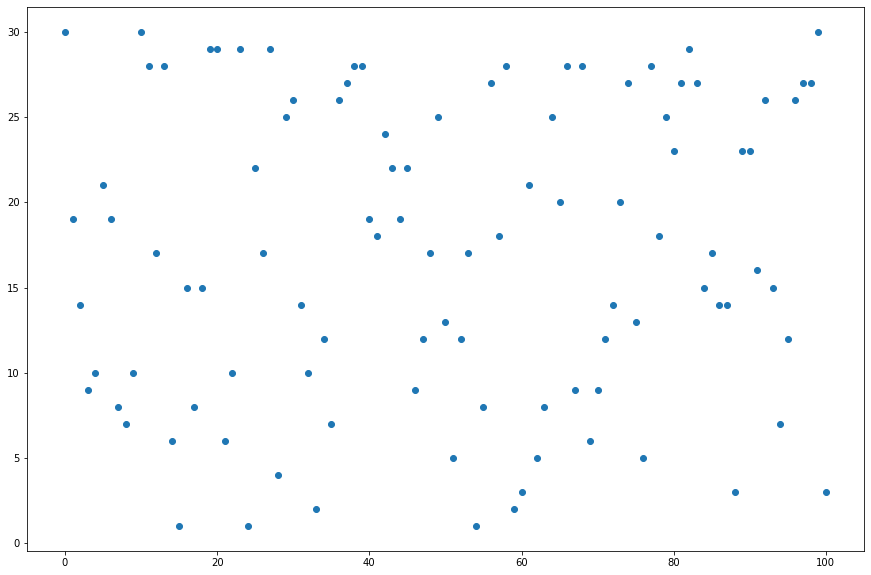

1705.5

In [4]:
time = np.linspace (0, 100, 101)
speed = np.array([randint(1, 30) for _ in range (101)])

distance (speed, time, args = points)

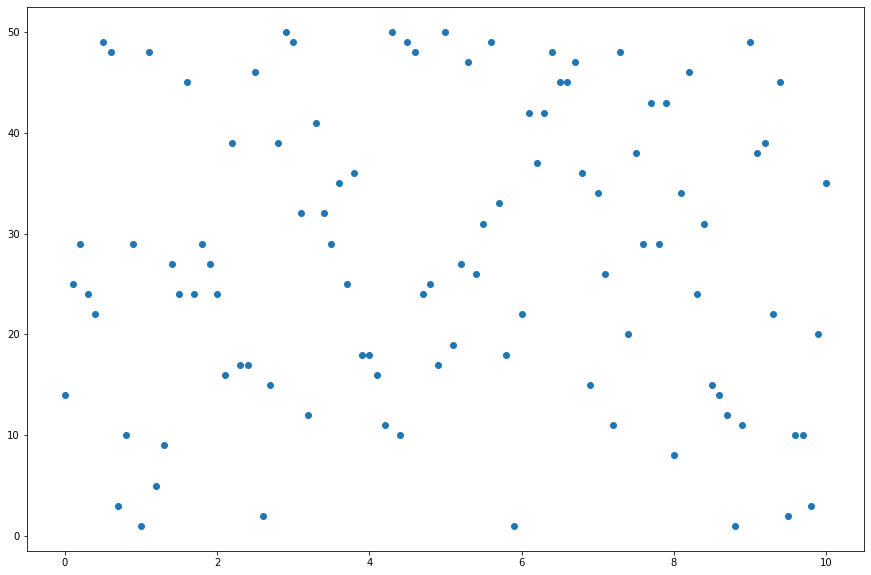

277.95000000000005

In [5]:
time = np.linspace (0, 10, 101)
speed = np.array([randint(1, 50) for _ in range (101)])

distance (speed, time)

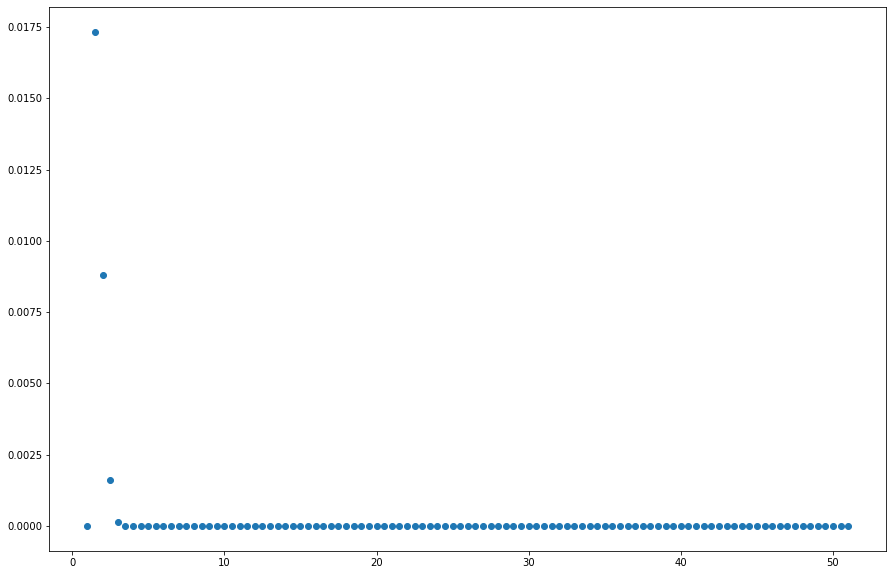

0.013952554480388363

In [6]:
distance (fun = f1, a = 1, b = 51)

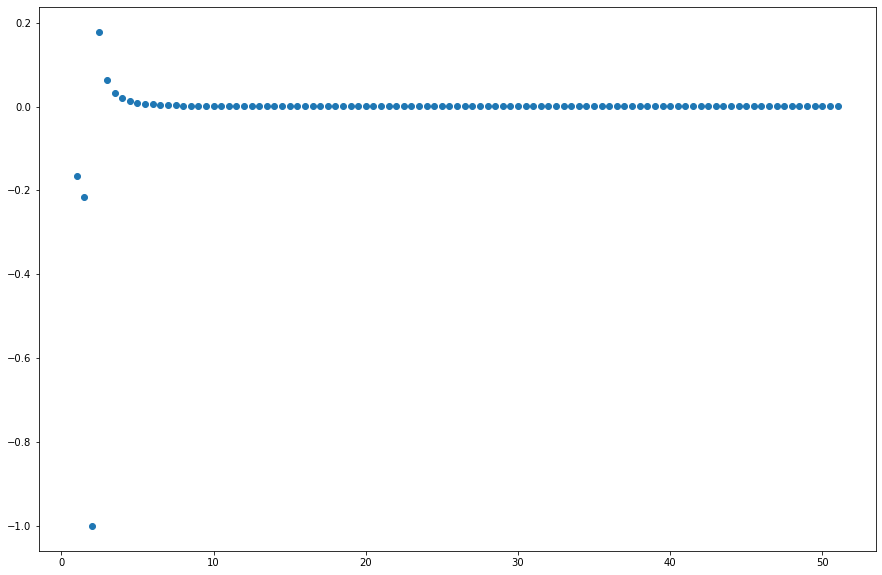

-0.473733316665881

In [7]:
distance (fun = f2, a = 1, b = 51)

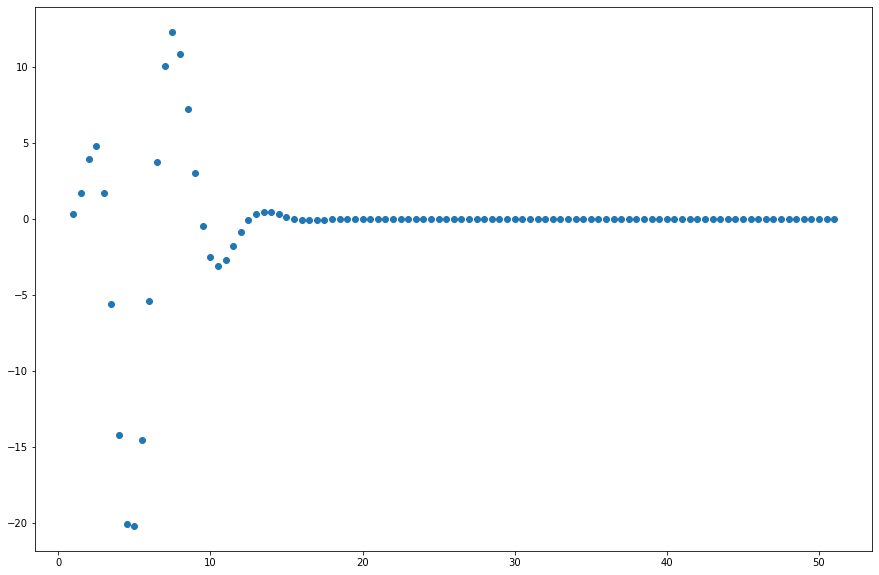

-15.081949723550016

In [8]:
distance (fun = f3, a = 1, b = 51)

## Złożona kwadratura Simpsona

### Funkcja licząca

In [9]:
def simpson_rule (y_vector = None, x_vector = None, fun = None, a = 1, b = 51):
    if fun != None:
        x_vector = np.linspace(a, b, 101)
        y_vector = np.array([fun(x) for x in x_vector])
    suma = .0
    h = x_vector[1] - x_vector[0]
    for i, y in enumerate(y_vector):
        if i == 0:
            suma += y
        elif i == len(y_vector) - 1:
            suma += y
        elif i % 2 == 1:
            suma += 4 * y
        else:
            suma += 2 * y
    suma = h * suma / 3
    return suma

In [10]:
def adaptive_int (y_vector = None, x_vector = None, fun = None, a = 1, b = 51):
    def simps (fun, a, b):
        h = (b - a) / 2
        return h * (fun (a) + 4 * fun(a+h) + fun (b)) / 3
        
    def adaptive (fun, a, b, epsilon):
        S = simps (fun, a, b)
        m = (a + b) / 2
        S1 = simps (fun, a, m)
        S2 = simps (fun, m, b)
        k = b - a
        if abs(S - S1 - S2) < 15 * epsilon:
            return S1 + S2
        else:
            return adaptive(fun, a, m, epsilon/2) + adaptive(fun, m, b, epsilon/2)
        
    if fun == None:
        print ("Błąd argumentów!")
        return
    epsilon = 10 ** -6
    return adaptive (fun, a, b, epsilon)

### Testy

In [11]:
start = 1
end = 11
f = f1
print ("Przedzział od", start, "do", end, "dla funkcji f1")
print ("Metoda trapezów:", distance (fun = f, a = start, b = end, plot = False))
print ("Złożona kwadratura simpsona:", simpson_rule (fun = f, a = start, b = end))
print ("Calkowanie adaptacyjne", adaptive_int (fun = f, a = start, b = end))

Przedzział od 1 do 11 dla funkcji f1
Metoda trapezów: 0.014464210280643448
Złożona kwadratura simpsona: 0.014468718669237319
Calkowanie adaptacyjne 0.014465679149879654


In [12]:
start = 1
end = 11
f = f2
print ("Przedzział od", start, "do", end, "dla funkcji f2")
print ("Metoda trapezów:", distance (fun = f, a = start, b = end, plot = False))
print ("Złożona kwadratura simpsona:", simpson_rule (fun = f, a = start, b = end))
print ("Calkowanie adaptacyjne", adaptive_int (fun = f, a = start, b = end))

Przedzział od 1 do 11 dla funkcji f2
Metoda trapezów: 1.5667321011407354
Złożona kwadratura simpsona: 2.117520867016597
Calkowanie adaptacyjne -0.14223203536906187


In [13]:
start = 1
end = 11
f = f3
print ("Przedzział od", start, "do", end, "dla funkcji f3")
print ("Metoda trapezów:", distance (fun = f, a = start, b = end, plot = False))
print ("Złożona kwadratura simpsona:", simpson_rule (fun = f, a = start, b = end))
print ("Calkowanie adaptacyjne", adaptive_int (fun = f, a = start, b = end))

Przedzział od 1 do 11 dla funkcji f3
Metoda trapezów: -13.861087996266539
Złożona kwadratura simpsona: -13.861130860628185
Calkowanie adaptacyjne -13.861124659961739


In [14]:
start = 1
end = 101
f = f1
print ("Przedzział od", start, "do", end, "dla funkcji f1")
print ("Metoda trapezów:", distance (fun = f, a = start, b = end, plot = False))
print ("Złożona kwadratura simpsona:", simpson_rule (fun = f, a = start, b = end))
print ("Calkowanie adaptacyjne", adaptive_int (fun = f, a = start, b = end))

Przedzział od 1 do 101 dla funkcji f1
Metoda trapezów: 0.00894896954815627
Złożona kwadratura simpsona: 0.011832659817028154
Calkowanie adaptacyjne 9.241380998521826e-292


In [15]:
start = 1
end = 101
f = f2
print ("Przedzział od", start, "do", end, "dla funkcji f2")
print ("Metoda trapezów:", distance (fun = f, a = start, b = end, plot = False))
print ("Złożona kwadratura simpsona:", simpson_rule (fun = f, a = start, b = end))
print ("Calkowanie adaptacyjne", adaptive_int (fun = f, a = start, b = end))

Przedzział od 1 do 101 dla funkcji f2
Metoda trapezów: -0.9750191124592614
Złożona kwadratura simpsona: -1.2968527532850915
Calkowanie adaptacyjne -0.13810770307389283


In [16]:
start = 1
end = 101
f = f3
print ("Przedzział od", start, "do", end, "dla funkcji f3")
print ("Metoda trapezów:", distance (fun = f, a = start, b = end, plot = False))
print ("Złożona kwadratura simpsona:", simpson_rule (fun = f, a = start, b = end))
print ("Calkowanie adaptacyjne", adaptive_int (fun = f, a = start, b = end))

Przedzział od 1 do 101 dla funkcji f3
Metoda trapezów: -15.15871611035104
Złożona kwadratura simpsona: -15.214660198242273
Calkowanie adaptacyjne -15.052670134916847


Całkowanie adaptacyjne niestety nie działa tak jakby oczekiwano, zauważyłem, że wymuszenie wykonanania określonej liczby podziałów zwiększa dokładność. Zmniejszenie epsilon też pomaga.

## Całki podwójne

### Funkcje liczące

In [17]:
def double_int (fun, a, b, h1, h2):
    fun2 = lambda y, x : fun (x, y)
    return integrate.dblquad (fun2, a, b, h1, h2)

In [18]:
def double_trap (fun, a, b, c, d, n1 = 10, n2 = 10):
    x_vector = np.linspace(a, b, n1)
    y_vector = np.linspace(c, d, n2)
    values = [[fun(x, y) for x in x_vector] for y in y_vector]
    return integrate.trapz(integrate.trapz(values, y_vector, axis=0), x_vector)

### Testy

In [25]:
# podpunkt 1
print(double_int (f4, 0, 1, lambda x : 0, lambda x : 1 - x))

(0.42920367320510433, 2.1056482351616083e-08)


In [20]:
print (double_int (f5, -3, 3, lambda x : -5, lambda x : 5))

(680.0, 7.549516567451064e-12)


In [21]:
print (double_trap (f5, -3, 3, -5, 5, 3, 5))

832.5


In [22]:
print (double_trap (f5, -3, 3, -5, 5, 10, 10))

696.7901234567901


In [23]:
print (double_trap (f5, -3, 3, -5, 5, 30, 50))

680.8445549590167


In [24]:
print (double_trap (f5, -3, 3, -5, 5, 100, 100))

680.1387613508825


Możemy zauważyć znaczący wzrost dokładności wraz ze wzrostem liczby punktów na siatce 2D, mała liczba punktów na siatce powoduje duże błedy.